Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import glob

In [2]:
def plot_losses(
    datasets,
    x_col,
    y_cols,
    labels,
    styles=None,
    title="Loss Comparison",
    xlabel="Epoch",
    ylabel="Loss",
    log_scale=False,
    legend_loc='upper right'
):
    """
    Trace une ou plusieurs courbes de pertes à partir de plusieurs datasets.
    datasets: liste de DataFrames ou dicts pandas
    x_col: nom de la colonne pour l'axe x (str)
    y_cols: liste des noms de colonnes à tracer (str)
    labels: liste des labels pour chaque courbe
    styles: liste de dicts pour les styles matplotlib (facultatif)
    title, xlabel, ylabel: titres et labels
    log_scale: bool, si True utilise une échelle log pour y
    ylim_zero: bool, si True force y>=0
    legend_loc: position de la légende
    """
    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 8))
    if styles is None:
        styles = [{} for _ in range(len(y_cols))]
    for i, (data, y_col, label, style) in enumerate(zip(datasets, y_cols, labels, styles)):
        plt.plot(
            data[x_col], data[y_col],
            label=label,
            linewidth=2.5,
            markersize=6,
            **style
        )
    plt.xlabel(xlabel, fontsize=14, fontweight='bold')
    plt.ylabel(ylabel + (" (log scale)" if log_scale else ""), fontsize=14, fontweight='bold')
    plt.title(title, fontsize=16, fontweight='bold')
    if log_scale:
        plt.yscale('log')
    plt.grid(True, which="both", ls="--", alpha=0.7)
    plt.legend(fontsize=12, frameon=True, shadow=True, borderpad=1, loc=legend_loc)
    plt.tight_layout()
    plt.savefig(f"exports/plots/{title.replace(' ', '_').lower()}.png", dpi=300)
    plt.show()

In [3]:
csv_files = glob.glob('exports/results/*.csv')
dfs_task = {os.path.splitext(os.path.basename(f))[0]: pd.read_csv(f) for f in csv_files}

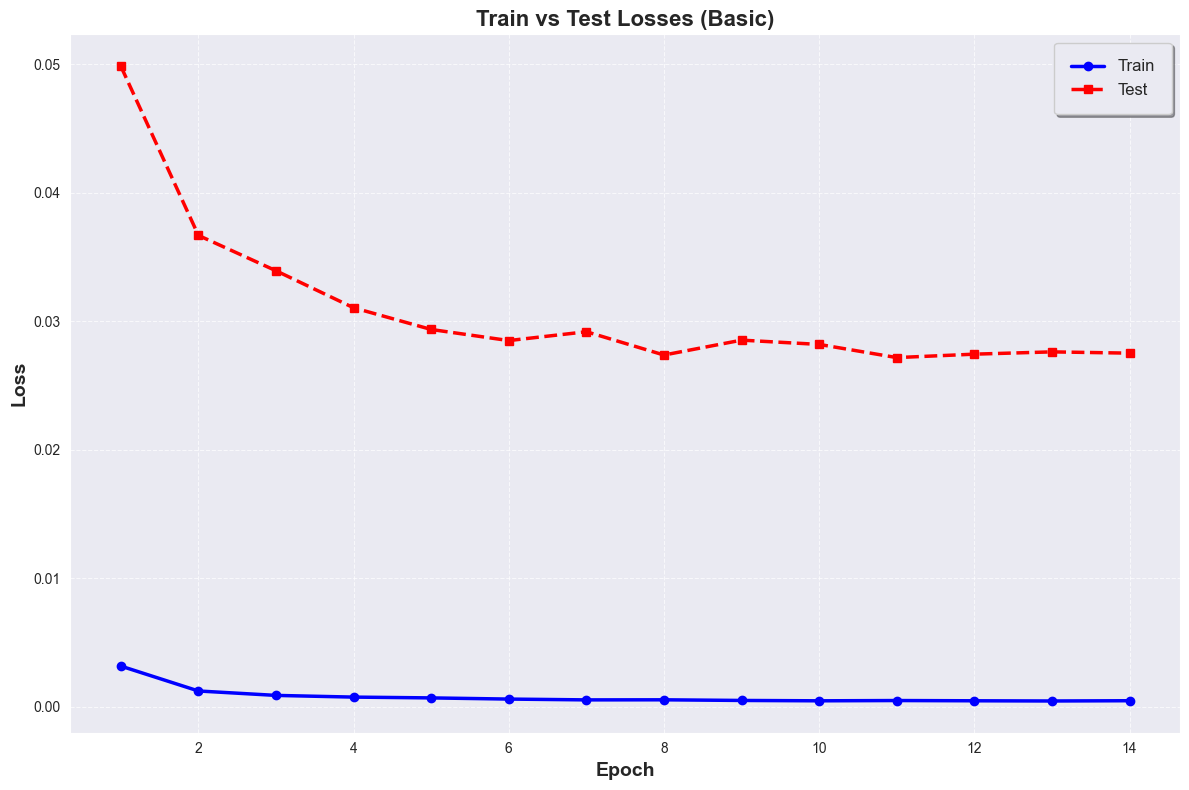

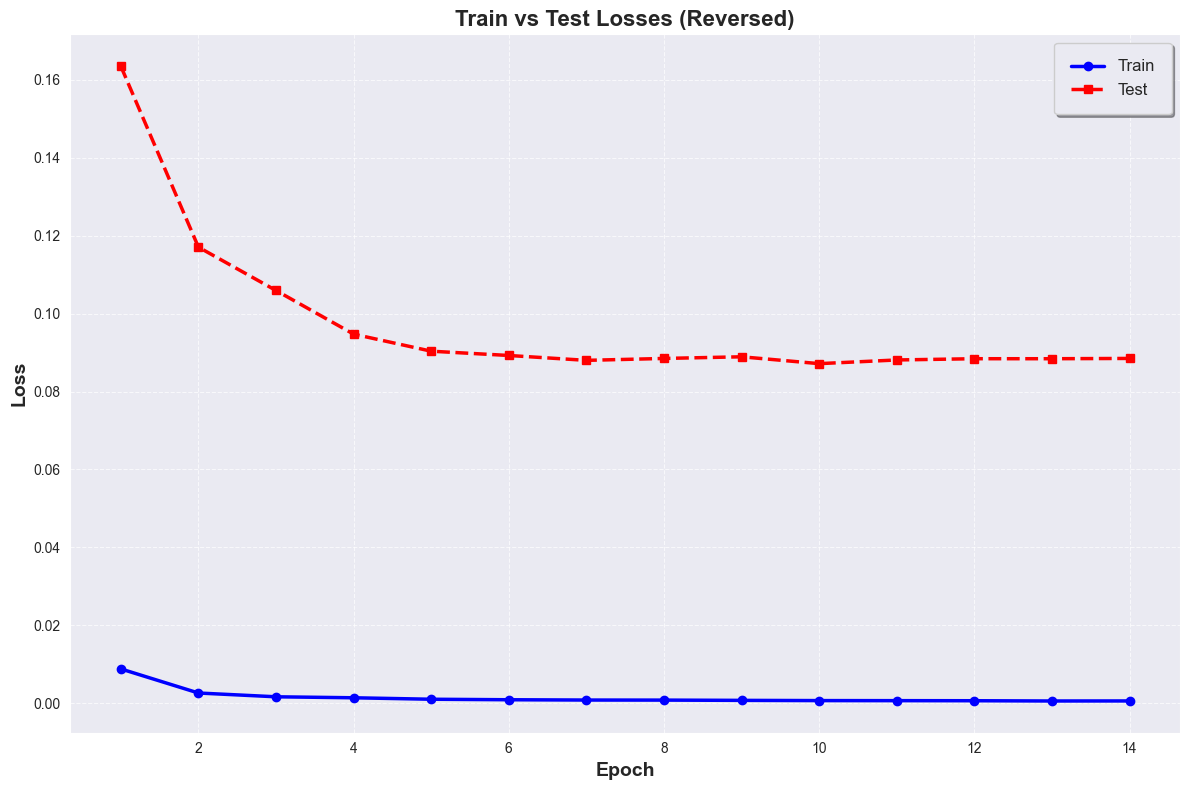

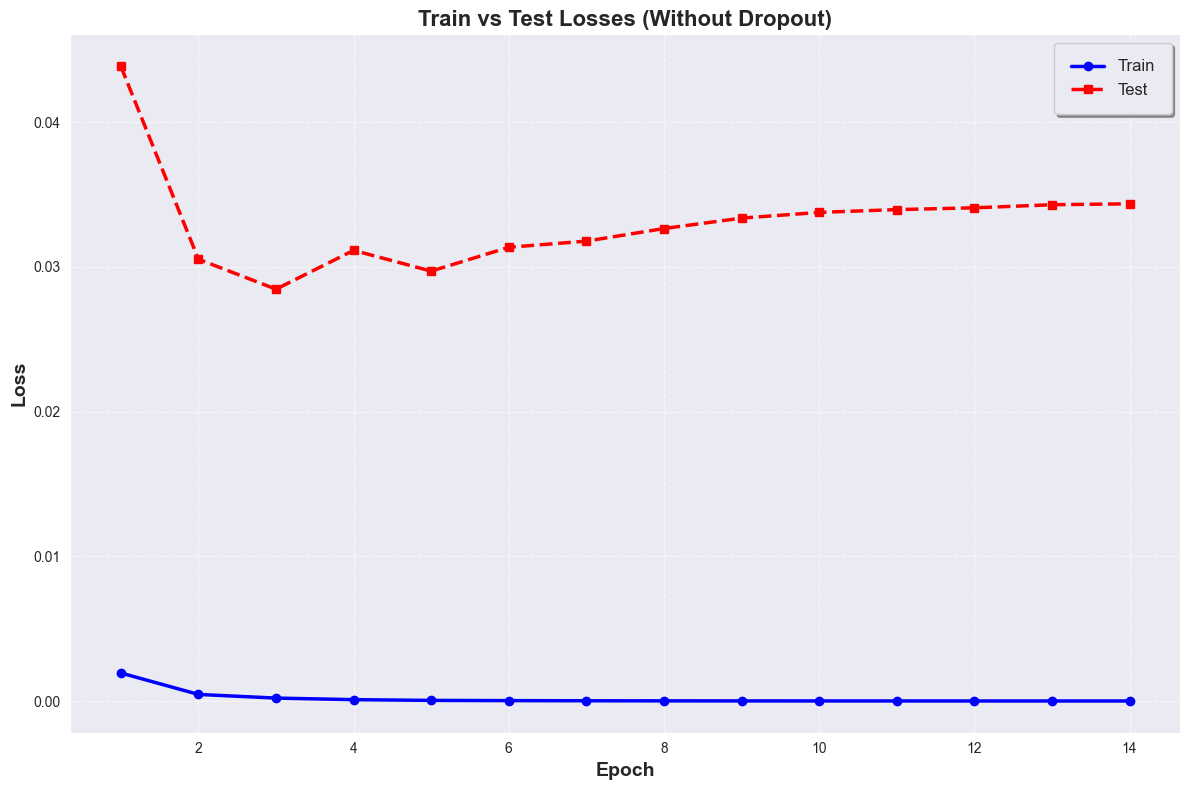

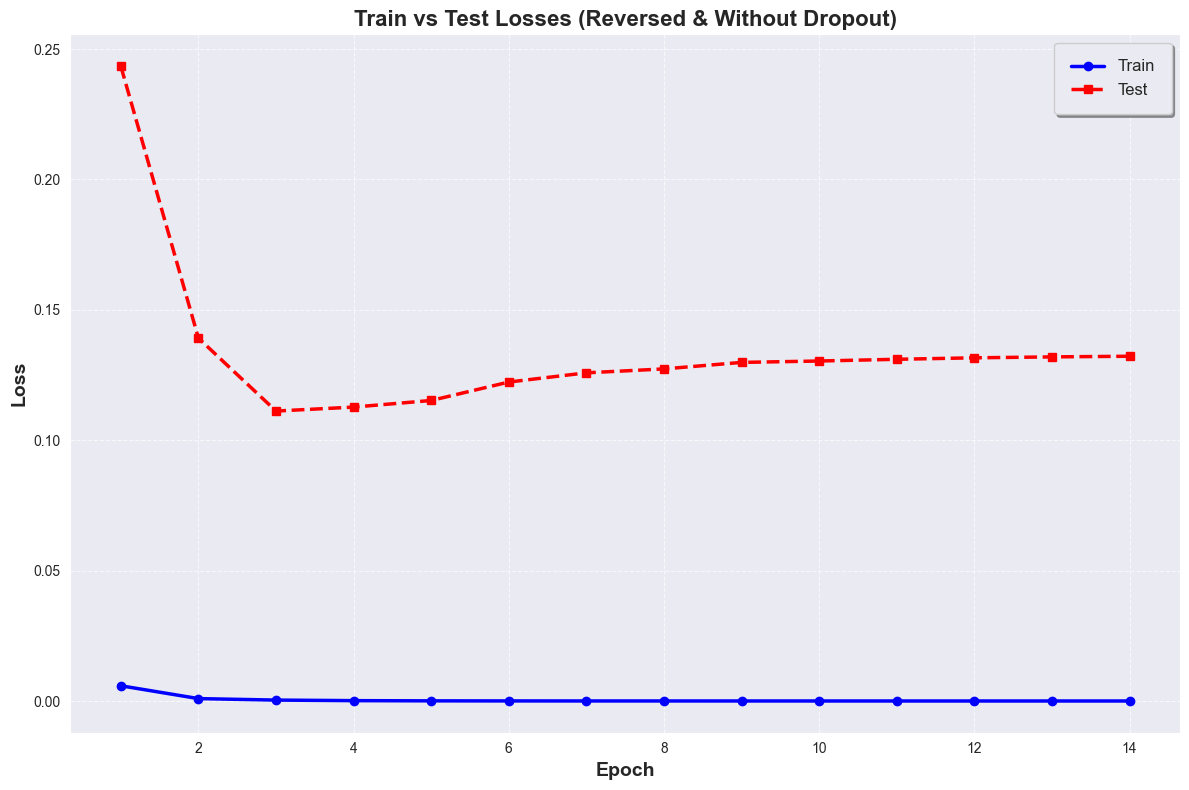

In [4]:
os.makedirs('exports/plots', exist_ok=True)

plot_losses(
    datasets=[
        dfs_task['train_losses_task1_basic'],
        dfs_task["test_losses_task1_basic"],
    ],
    x_col="epoch",
    y_cols=["train_loss", "test_loss"],
    labels=[
        "Train",
        "Test",
    ],
    title="Train vs Test Losses (Basic)",
    xlabel="Epoch",
    ylabel="Loss",
    log_scale=False,
    legend_loc='upper right',
    styles=[
        {"color": "blue", "linestyle": "-", "marker": "o"},
        {"color": "red", "linestyle": "--", "marker": "s"},
    ]
)

plot_losses(
    datasets=[
        dfs_task['train_losses_task2_reversed'],
        dfs_task["test_losses_task2_reversed"],
    ],
    x_col="epoch",
    y_cols=["train_loss", "test_loss"],
    labels=[
        "Train",
        "Test",
    ],
    title="Train vs Test Losses (Reversed)",
    xlabel="Epoch",
    ylabel="Loss",
    log_scale=False,
    legend_loc='upper right',
    styles=[
        {"color": "blue", "linestyle": "-", "marker": "o"},
        {"color": "red", "linestyle": "--", "marker": "s"},
    ]
)

plot_losses(
    datasets=[
        dfs_task['train_losses_task3_no_dropout'],
        dfs_task["test_losses_task3_no_dropout"],
    ],
    x_col="epoch",
    y_cols=["train_loss", "test_loss"],
    labels=[
        "Train",
        "Test",
    ],
    title="Train vs Test Losses (Without Dropout)",
    xlabel="Epoch",
    ylabel="Loss",
    log_scale=False,
    legend_loc='upper right',
    styles=[
        {"color": "blue", "linestyle": "-", "marker": "o"},
        {"color": "red", "linestyle": "--", "marker": "s"},
    ]
)

plot_losses(
    datasets=[
        dfs_task['train_losses_task4_reversed_no_dropout'],
        dfs_task["test_losses_task4_reversed_no_dropout"],
    ],
    x_col="epoch",
    y_cols=["train_loss", "test_loss"],
    labels=[
        "Train",
        "Test",
    ],
    title="Train vs Test Losses (Reversed & Without Dropout)",
    xlabel="Epoch",
    ylabel="Loss",
    log_scale=False,
    legend_loc='upper right',
    styles=[
        {"color": "blue", "linestyle": "-", "marker": "o"},
        {"color": "red", "linestyle": "--", "marker": "s"},
    ]
)

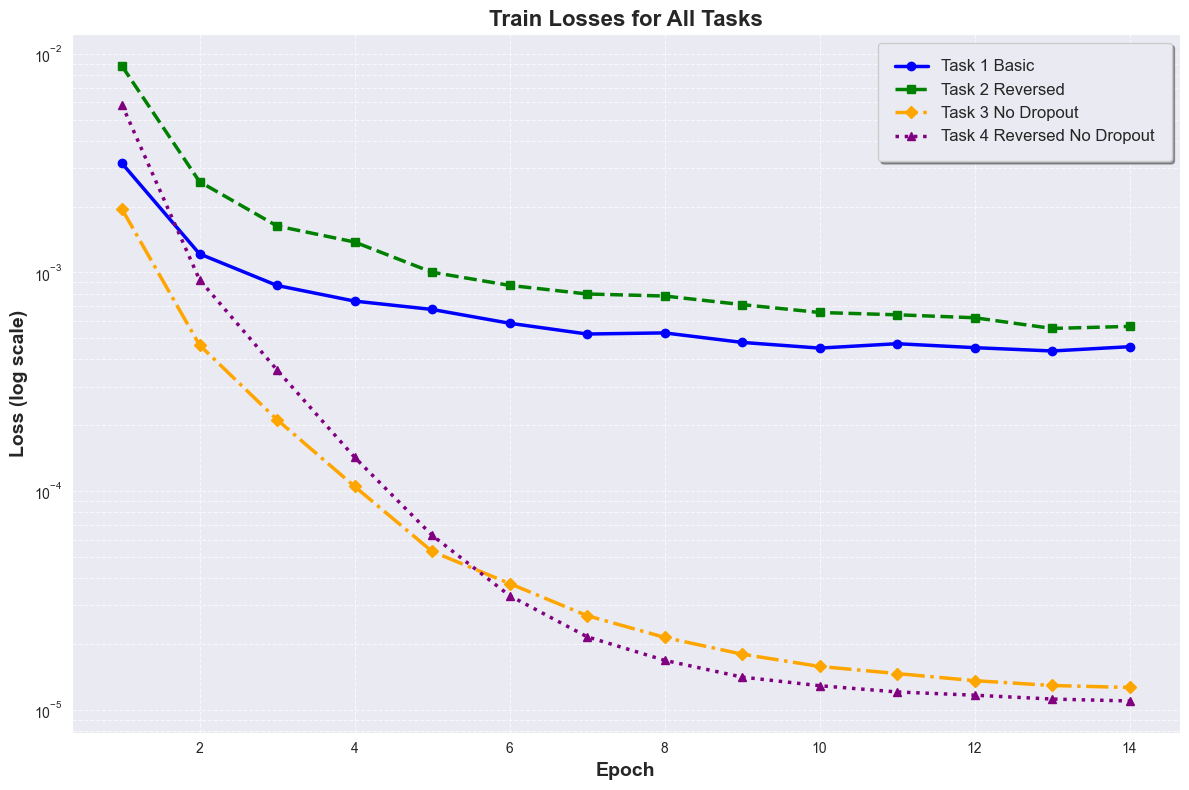

In [5]:
plot_losses(
    datasets=[
        dfs_task['train_losses_task1_basic'],
        dfs_task['train_losses_task2_reversed'],
        dfs_task['train_losses_task3_no_dropout'],
        dfs_task['train_losses_task4_reversed_no_dropout'],
    ],
    x_col="epoch",
    y_cols=["train_loss"] * 4,
    labels=[
        "Task 1 Basic",
        "Task 2 Reversed",
        "Task 3 No Dropout",
        "Task 4 Reversed No Dropout",
    ],
    title="Train Losses for All Tasks",
    xlabel="Epoch",
    ylabel="Loss",
    log_scale=True,
    legend_loc='upper right',
    styles=[
        {"color": "blue", "linestyle": "-", "marker": "o"},
        {"color": "green", "linestyle": "--", "marker": "s"},
        {"color": "orange", "linestyle": "-.", "marker": "D"},
        {"color": "purple", "linestyle": ":", "marker": "^"},
    ]
)

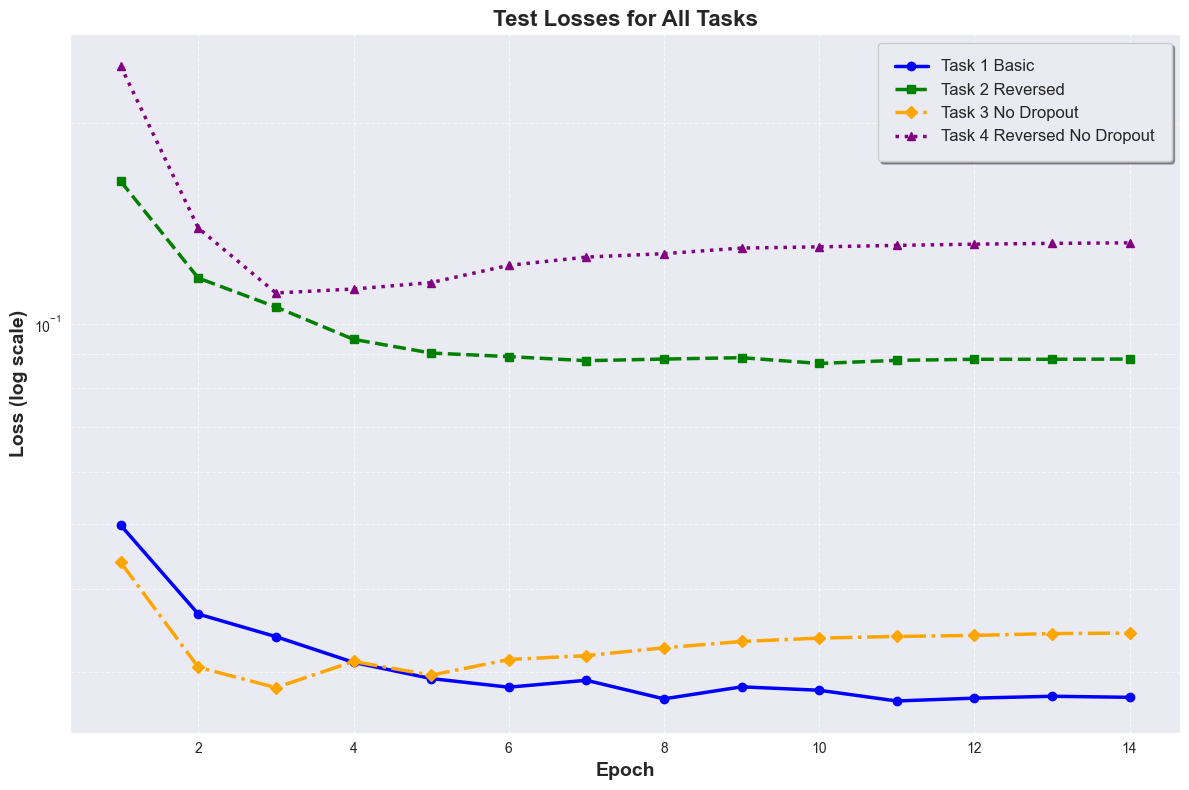

In [6]:
plot_losses(
    datasets=[
        dfs_task['test_losses_task1_basic'],
        dfs_task['test_losses_task2_reversed'],
        dfs_task['test_losses_task3_no_dropout'],
        dfs_task['test_losses_task4_reversed_no_dropout'],
    ],
    x_col="epoch",
    y_cols=["test_loss"] * 4,
    labels=[
        "Task 1 Basic",
        "Task 2 Reversed",
        "Task 3 No Dropout",
        "Task 4 Reversed No Dropout",
    ],
    title="Test Losses for All Tasks",
    xlabel="Epoch",
    ylabel="Loss",
    log_scale=True,
    legend_loc='upper right',
    styles=[
        {"color": "blue", "linestyle": "-", "marker": "o"},
        {"color": "green", "linestyle": "--", "marker": "s"},
        {"color": "orange", "linestyle": "-.", "marker": "D"},
        {"color": "purple", "linestyle": ":", "marker": "^"},
    ]
)